### Issue with the varying FDP curves

In [55]:
import numpy as np
import numpy.matlib as npm
import sys
import matplotlib.pyplot as plt 

import sanssouci as sa

import random

In [66]:
random.seed(a=2022)

m = 2000         # number of variables     (eg : number of voxels in an image)
n = 80            # number of observations  (eg : number of images)
pi0 = 0.9       # proportion of noise (true null hypotheses)
p0 = int(np.round(pi0*m)) # number of true null hypotheses (non active voxels)
rho = 0.3        # equi-correlation
s = 1             # signal to noise ratio (because sigma is 1 CHECK!)

# generate noise
Z=np.random.randn(n,m)
w=np.random.randn(n)
W=Z.copy()
for i in range(m):
  W[:,i]=w[:] # W has the same w for each subject to ensure the dependence
Y=np.sqrt(1-rho)*Z + np.sqrt(rho)*W

# cov(Y_n(v), Y_m(v)) = E( sqrt(1-rho)z_n + sqrt(rho)*w,sqrt(1-rho)z_m + sqrt(rho)*w) = (1-rho)delta_{nm} + rho
# (as var(w) = 1 = var(z_n) = var(z_m)) (so the text above is wrong!)

# add signal (for false null hypotheses)
categ=np.random.binomial(1, 0.5, size=n) # Equal probability of each - but ususally not balanced in fact!
data = Y.copy()
w1=np.where(categ==1)


Can toggle this to see the effect of signal

In [67]:
# Add signal to the data when the category is 1! :) 
data[w1, (p0+1):m] = Y[w1, (p0+1):m] - s

(array([384., 179., 184., 177., 172., 186., 191., 182., 162., 183.]),
 array([5.18740606e-11, 9.99836726e-02, 1.99967345e-01, 2.99951018e-01,
        3.99934690e-01, 4.99918363e-01, 5.99902035e-01, 6.99885708e-01,
        7.99869381e-01, 8.99853053e-01, 9.99836726e-01]),
 <a list of 10 Patch objects>)

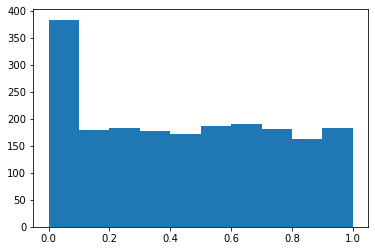

In [68]:
rwt = sa.row_welch_tests(data, categ)
pvals_perm = rwt['p_value']
plt.hist(pvals_perm)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
The input p-values were not sorted -> this is done now
The input p-values were not sorted -> this is done now
The input p-values were not sorted -> this is done now
The input p-values were not sorted -> this is done now
The input p-values were not sorted -> this is done now
The input p-values were not sorted -> this is done now
The input p-values were not sorted -> this is done now
The input p-values were not sorted -> this is done now
The input p-values were not sorted -> this is done now
The input p-values were not sorted -> this is done now


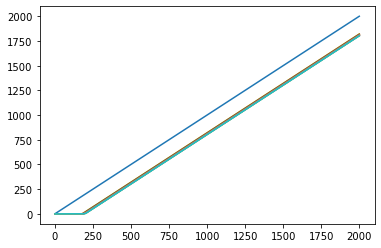

In [78]:
lambda_set = np.arange(10)/10
print(lambda_set)
for I in np.arange(len(lambda_set)):
    thresh = sa.t_linear(lambda_set[I], np.arange(1,m+1), m)
    max_FDP_perm = sa.curve_max_fp(pvals_perm, thresh)
    plt.plot(max_FDP_perm)


Calculate relevant lambda using permutation

In [70]:
# Initialize the number of bootstraps and the alpha level
B = 100; alpha = 0.1;
pval0 = sa.get_perm_p(data, categ, B=B , row_test_fun=sa.row_welch_tests)
piv_stat = sa.get_pivotal_stats(pval0, K=m)
lambda_perm = np.quantile(piv_stat, alpha)

print('Lambda Perm:', lambda_perm)
thr_perm = sa.t_linear(lambda_perm, np.arange(1,m+1), m)

Lambda Perm: 0.17261982120186925
